In [1]:
from ml_battery import *
import sklearn.pipeline
import pickle
import pandas as pd
import numpy as np
import sklearn.ensemble
import sklearn.svm
import sklearn.linear_model
import sklearn.cross_validation
import os.path
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\ProgramData\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.datasets import load_boston
data = load_boston()
df = pd.DataFrame(np.hstack((data.data,data.target.reshape((-1,1)))), columns=(list(data.feature_names)+["target"]))
data_train, data_test = sklearn.cross_validation.train_test_split(df, test_size=0.2, random_state=0)

In [3]:
X_train, y_train = data_train.drop("target", axis=1), data_train[["target"]]
X_test, y_test = data_test.drop("target", axis=1), data_test[["target"]]
weights_train, weights_test = np.ones(X_train.shape[0]), np.ones(X_test.shape[0])

In [4]:
codebook = pd.DataFrame(
    {
        "Name": ["RAD","CHAS"],
        "Type": ["C","C"]
    }
).set_index("Name")

In [5]:
clf = sklearn.pipeline.Pipeline([
    ('data_transformation', CodebookTransformer(codebook)),
    ('feature_selection', SelectFromModelPandas(sklearn.ensemble.RandomForestRegressor())),
    ('classification', StackedRegressor(MultiRegressor([
            ("random forest", HyperparameterOptimizedRegressor(sklearn.ensemble.RandomForestRegressor(), max_depth=(2,10))),
            ("linear regression", sklearn.linear_model.LinearRegression()),
            ("ridge regression", sklearn.linear_model.Ridge()),
            ("dummy regressor", PatchedDummyRegressor()),
            ("one-hidden MLP", OneLayerNNRegressor())
        ], parallel=False), sklearn.linear_model.LinearRegression())),
])

In [6]:
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\feature_selection\from_model.py:169: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

Initialization
-------------------------------------------
 Step |   Time |      Value |   max_depth | 
    1 | 00m00s |   19.01876 |      7.3382 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    2 | 00m00s |   18.95520 |      4.5203 | 
    3 | 00m00s |   22.58731 |      2.6976 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    4 | 00m00s |   18.88774 |      5.9170 | 
    5 | 00m00s |   18.09929 |      8.4340 | 
Bayesian Optimization
-------------------------------------------
 Step |   Time |      Value |   max_depth | 
    6 | 00m01s |   21.26457 |      2.3321 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    7 | 00m01s |   20.47734 |      3.0031 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    8 | 00m00s |   21.28688 |      2.6237 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    9 | 00m00s |   22.39378 |      2.8024 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   10 | 00m04s |   21.40736 |      2.7363 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   11 | 00m05s |   23.32580 |      2.8755 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   12 | 00m02s |   23.00663 |      2.8621 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   13 | 00m02s |   21.39383 |      2.9143 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   14 | 00m02s |   23.13323 |      2.8776 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   15 | 00m02s |   21.99566 |      2.8708 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   16 | 00m02s |   21.18812 |      2.8759 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   17 | 00m01s |   21.18977 |      2.8747 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   18 | 00m02s |   21.62354 |      2.8752 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   19 | 00m02s |   22.41699 |      2.8755 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00024665]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 61, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   20 | 00m03s |   21.50226 |      2.8754 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   21 | 00m02s |   21.87460 |      2.8776 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   22 | 00m04s |   20.93429 |      2.8622 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   23 | 00m04s |   21.66519 |      2.8025 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00105066]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 64, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   24 | 00m05s |   21.70988 |      2.8755 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00092007]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   25 | 00m03s |   22.33688 |      2.8754 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   26 | 00m04s |   22.34543 |      2.6976 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00292186]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   27 | 00m03s |   21.21948 |      2.6976 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   28 | 00m05s |   21.00595 |      2.8025 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   29 | 00m03s |   21.88097 |      2.8776 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00155226]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 59, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   30 | 00m07s |   21.93460 |      2.8024 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00138189]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00040473]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   31 | 00m03s |   22.00163 |      2.8708 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   32 | 00m03s |   21.81907 |      2.8776 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   33 | 00m05s |   22.02726 |      2.8025 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   34 | 00m03s |   21.78276 |      2.7364 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   35 | 00m07s |   21.01073 |      2.8755 | 


C:\ProgramData\Anaconda\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00088959]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\cbrown2\Desktop\Scott Brown\ML for travel demand modeling\src\ml_battery\ml_helpers.py:169: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X,y,sample_weight=sample_weight)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('data_transformation', <ml_battery.ml_helpers.CodebookTransformer object at 0x00000157A13D8748>), ('feature_selection', SelectFromModelPandas(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_i...      n_epochs=1000, n_hidden=20, regularization=0.01, trainable=True))],
        parallel=False)))])

In [7]:
multiclf = sklearn.pipeline.Pipeline(clf.steps[:2] + [("classifier", clf.steps[2][1].multiestimator)])

In [8]:
pred_stacked = clf.predict(X_test)
pred = multiclf.predict(X_test)

C:\ProgramData\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


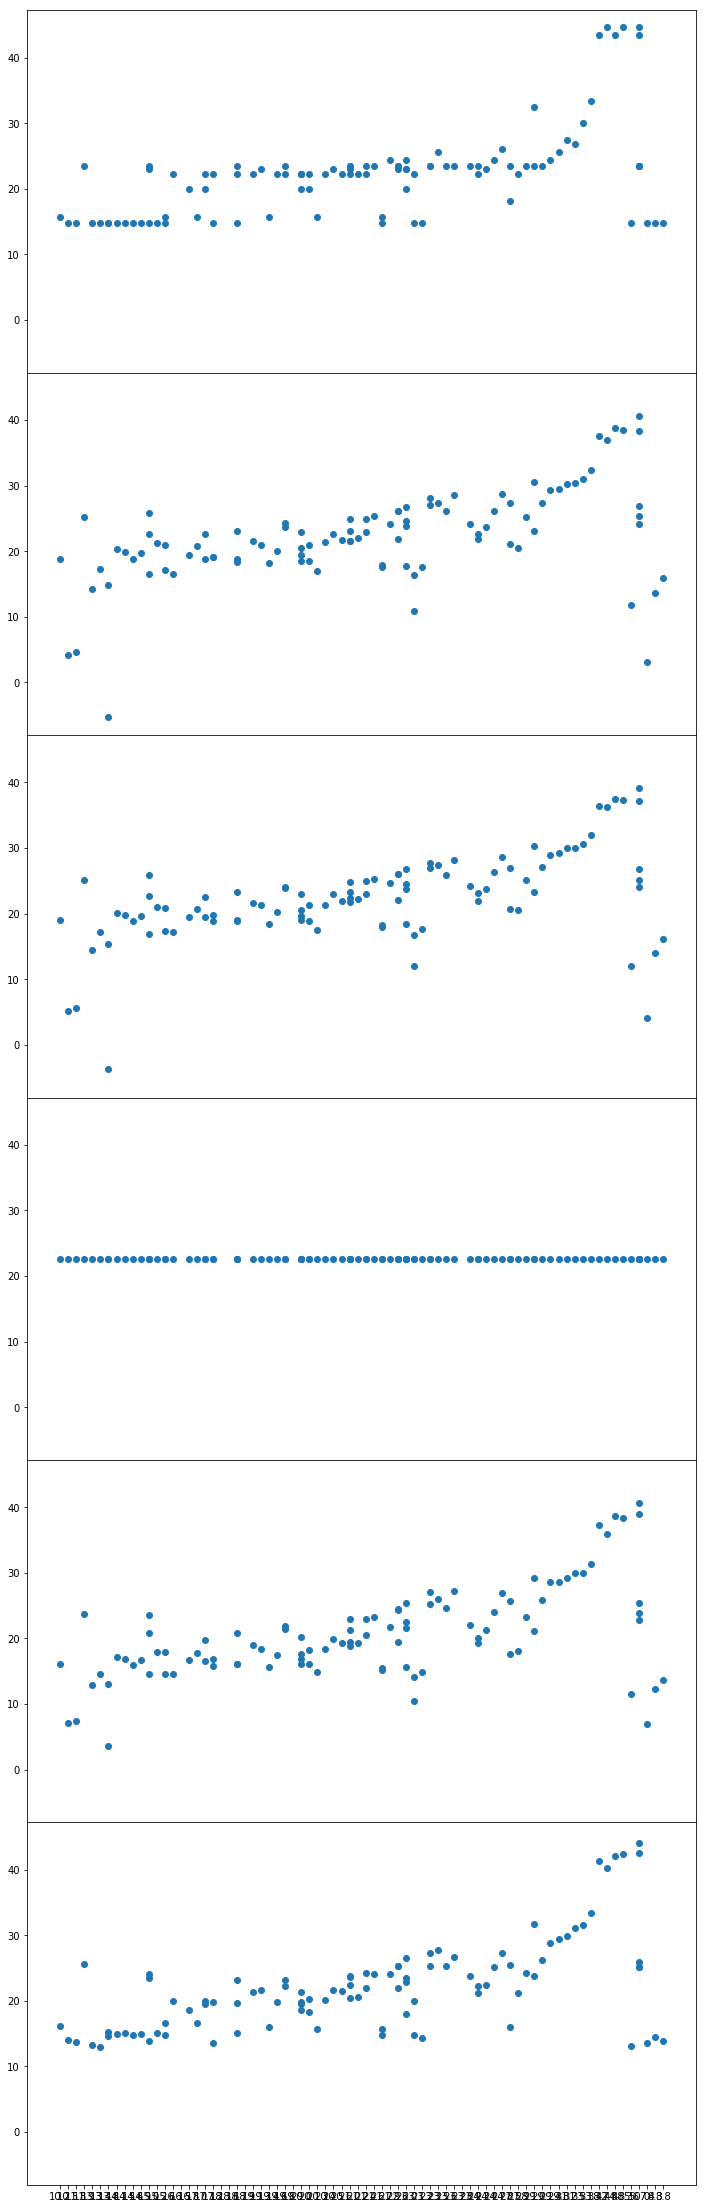

In [9]:
f, axes = plt.subplots(len(clf.steps[-1][1].multiestimator.estimators)+1, sharex=True, sharey=True, figsize=(12,40))
for i in range(len(axes)-1):
    ax = axes[i]
    ax.scatter(y_test, pred[i][1])
axes[-1].scatter(y_test, pred_stacked)


f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()

In [10]:
(stacked_score, stacked_feature_importances), (multi_scores, multi_feature_importances) = clf.score(X_test, y_test)
multi_scores["stacked"] = stacked_score

C:\ProgramData\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
multi_scores

,dummy regressor,linear regression,one-hidden MLP,random forest,ridge regression,stacked
explained variance,0.000000,0.562146,0.638684,0.645124,0.558581,0.672091
mean absolute error,6.250087,4.077614,3.635041,3.477066,4.141110,3.285445
mean squared error,81.582317,35.667823,32.058435,28.904197,35.972592,26.704260
R^2,-0.001890,0.561973,0.606299,0.645036,0.558231,0.672052
training time,0.001000,0.165128,7.264953,108.756545,0.000994,135.051038
